## データ分析の趣旨
iris dataにおける'versicolor', 'virginica'を分類することを目的とし、説明変数にsepal length (cm)と  'petal length (cm)'
をとり、簡単なEDAで仮説をたててから検証する。

In [29]:
# import module
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
# import iris data
from sklearn.datasets import load_iris
iris_dataset = load_iris()
list(iris_dataset.target_names)

['setosa', 'versicolor', 'virginica']

In [3]:
# Check an iris dataset
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# mold the array of iris to dataframe
X = pd.DataFrame(np.array(iris_dataset.data)) 

In [5]:
# head
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
# describe
X.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
# nan
df_iris.isnull().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

欠損値がないので、そのまま分析を進める。

In [9]:
# rename the columns
columns_dic = {0: 'sepal_length', 1: 'sepal_width', 2: 'petal_length', 3: 'petal_width'}

X.rename(columns= columns_dic, inplace=True)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# mold the array to dataframe
Y = pd.DataFrame(np.array(iris_dataset.target)) 

# rename a column
Y = Y.rename(columns = {0:'Species'})

# check the dataset
Y['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [11]:
# combine features and categorie
df_iris = X.join(Y)

# check
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
columns_process = ["sepal_length", "petal_length", "Species"]

# generate a dataframe for analyzing iris dataset
df_iris_del_index = df_iris[df_iris.Species != 0] # virgicolor and virginica

#　analysis about 'versicolor', 'virginica'
df_train_test = df_iris_del_index.loc[:, columns_process]
df_train_test['Species'] -= 1
df_train_test['Species'].unique()

array([0, 1])

<Figure size 1080x1080 with 0 Axes>

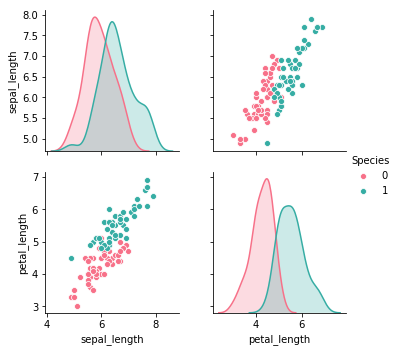

In [19]:
'''
Overview the histgram and plot
'''
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 15))

sns.pairplot(df_train_test, vars=df_train_test.iloc[:,:2].columns, 
             hue="Species", palette="husl")

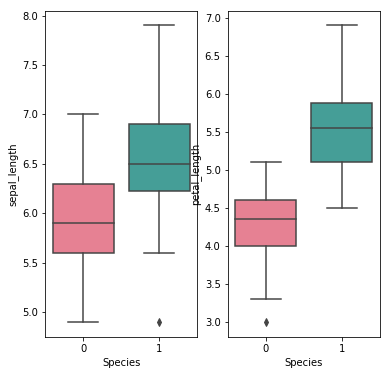

In [25]:
# plot box plot
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(1,2,1)
ax1 = sns.boxplot(x="Species", y="sepal_length", 
                  data=df_train_test, palette="husl") 
ax2 = plt.subplot(1,2,2)
ax2 = sns.boxplot(x="Species", y="petal_length", 
                  data=df_train_test, palette="husl")

In [30]:
# individual variable and non-dividual variable
X = df_train_test.iloc[:, :-1].values # by number/ values --> serries
y = df_train_test.loc[:, "Species"].values # by column's name

# for spliting train and test
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3)

###### 【仮説】
"petal_length"が5cm前後で、'versicolor', 'virginica'が分類される。
<br>"sepal_lenth"では、6.3cm前後で分類できるように見えるが、"petal_length"に比べ、信頼区間の精度は劣るのではないか。

###### 【検証方法】
ロジスティック回帰分析を用い、適切なパラメータを求め、二種分類の式を作成する。

### 【問題1】ロジスティック回帰のクラスを作成する
ロジスティック回帰のクラスを作成し、Sprint2で作成した分類のパイプラインに組み込んでください。
<br>クラスの基本構造はSprint3の線形回帰を参考にし、名前はScratchLogisticRegressionとしてください。
<br>
<br>メソッドやパラメータなどはscikit-learnを参考にしてください。
<br>推定関係ではラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。
<br>sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation
<br>
<br>検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

In [281]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=1000, lr=0.01, bias=True, verbose=True, lamda=0.01, num_feature=2, threshold=0.5):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.n = 0
        self.lamda = lamda
        self.threshold = threshold
        
        # thetaを保存するリストを作成
        self.theta = np.zeros((self.num_iter, int(bias) + num_feature))
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.use_loss = np.zeros(self.num_iter)        
        self.val_loss = np.zeros(self.num_iter)
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        m = len(X)
        # 基本統計量
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X - mu)/sigma
        
        # バイアス項の挿入
        if self.bias:
            X = np.hstack((np.ones(m).reshape(m, 1),X))
        # 特徴量の数取得
        self.n = X.shape[1]
            
        # X_vaにもバイアスの追加
        if type(X_val)==np.ndarray:
            m_val = len(X_val)
             # 基本統計量
            mu_val = X_val.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
            sigma_val = X_val.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

            # 標準化処理
            X_val = (X_val - mu_val)/sigma_val
            # バイアス項の挿入
            X_val = np.hstack((np.ones(m_val).reshape(m_val, 1), X_val))
        
        # シータの初期化
        self._init_theta()
        
        # 最急降下法
        if type(X_val)==np.ndarray:
            self._gradient_descent(X, y, X_val, y_val)
            
        else:
            self._gradient_descent(X, y)            
    
    def _init_theta(self):
        """
        self.coef_: 次の形のndarray, shape(n_features)
        パラメータをランダムに初期化します。
        """
        self.coef_ = np.random.rand(self.n, 1)
        
    def sigmoid(z):
        e = math.e
        return 1/(1+(e**-z))
        
    def _logistic_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """

        hx = sigmoid(np.dot(X, self.coef_))
                     
        return hx
    

    def _gradient_descent(self, X, y, X_val=None, y_val=None):
        """
        Parameters
         ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        alpha = self.lr
        m = len(X)
        y = y.reshape(m, 1)
        hx = self._logistic_hypothesis(X)
        count = 0

        for i in range(self.num_iter):
            if self.bias:
                coef_bias_zero = self.coef_.copy()
                coef_bias_zero[0] = 0
                
            self.coef_ = self.coef_ - alpha * ((1/m) * sum(np.dot(X.T, self._logistic_hypothesis(X)-y)) + (self.lamda/m)*coef_bias_zero)
            
            self.theta[i] = self.coef_.T
            hx = self._logistic_hypothesis(X)        
            
            if self.verbose:
                log = 'COUNT:{}, 目的関数:{}'
                #verboseをTrueにした際は学習過程を出力
                print(log.format(count+1, self.cross_entropy(hx, y)))

            # trainデータのlossのリザルトを出す
            if self.verbose:
                self.loss[i] = self.cross_entropy(hx, y)
                
            # X_val入力ある場合lossのリザルトを出す
            if type(X_val) == np.ndarray:
                val_pred = self._logistic_hypothesis(X_val)
                self.val_loss[i] = self.cross_entropy(val_pred, y_val)

            count += 1
    

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        # 標準化処理
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X -mu)/sigma
        
        if self.bias:
            m = len(X)
            X = np.hstack((np.ones(m).reshape(m,1), X))
        predict =  sigmoid(np.dot(X, self.coef_))
        predict[predict > self.threshold] = 1
        predict[predict <= self.threshold] = 0
        
        return predict
    
    
    def predict_proba(self, X):
        # 標準化処理
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X -mu)/sigma
        
        if self.bias:
            m = len(X)
            X = np.hstack((np.ones(m).reshape(m,1), X))
        predict =  sigmoid(np.dot(X, self.coef_))

        return predict
        
                
    def cross_entropy(self, hx, y):
        """
        クロスエントロピーの計算

        Parameters
        ----------
        hx : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        # リシェイプ
        y = y.reshape(len(y), 1)
        m = len(y)
        
        J = (1/m)*sum(sum(-(y*np.log(hx))-(1-y)*np.log(1-hx))) + (self.lamda/(2*m))*sum((sum((self.coef_)**2)))
        return J

In [282]:
slr = ScratchLogisticRegression()
slr.fit(X_train, y_train, X_test, y_test)

COUNT:1, 目的関数:0.5408297081546403
COUNT:2, 目的関数:0.5401188338093214
COUNT:3, 目的関数:0.5394180812567965
COUNT:4, 目的関数:0.5387272562093689
COUNT:5, 目的関数:0.5380461690960939
COUNT:6, 目的関数:0.5373746349269697
COUNT:7, 目的関数:0.53671247316151
COUNT:8, 目的関数:0.536059507581557
COUNT:9, 目的関数:0.5354155661681818
COUNT:10, 目的関数:0.5347804809825364
COUNT:11, 目的関数:0.5341540880505214
COUNT:12, 目的関数:0.5335362272511359
COUNT:13, 目的関数:0.5329267422083857
COUNT:14, 目的関数:0.5323254801866271
COUNT:15, 目的関数:0.5317322919892278
COUNT:16, 目的関数:0.5311470318604316
COUNT:17, 目的関数:0.5305695573903189
COUNT:18, 目的関数:0.5299997294227528
COUNT:19, 目的関数:0.5294374119662142
COUNT:20, 目的関数:0.5288824721074221
COUNT:21, 目的関数:0.5283347799276473
COUNT:22, 目的関数:0.5277942084216286
COUNT:23, 目的関数:0.5272606334189986
COUNT:24, 目的関数:0.5267339335081375
COUNT:25, 目的関数:0.5262139899623738
COUNT:26, 目的関数:0.5257006866684464
COUNT:27, 目的関数:0.5251939100571601
COUNT:28, 目的関数:0.5246935490361517
COUNT:29, 目的関数:0.5241994949247041
COUNT:30, 目的関数:0.523711641

COUNT:527, 目的関数:0.47378829258226635
COUNT:528, 目的関数:0.4737771883609763
COUNT:529, 目的関数:0.4737661471972427
COUNT:530, 目的関数:0.4737551687012585
COUNT:531, 目的関数:0.4737442524859185
COUNT:532, 目的関数:0.4737333981668021
COUNT:533, 目的関数:0.4737226053621479
COUNT:534, 目的関数:0.473711873692835
COUNT:535, 目的関数:0.4737012027823616
COUNT:536, 目的関数:0.4736905922568244
COUNT:537, 目的関数:0.47368004174489736
COUNT:538, 目的関数:0.47366955087781437
COUNT:539, 目的関数:0.4736591192893443
COUNT:540, 目的関数:0.47364874661577594
COUNT:541, 目的関数:0.4736384324958947
COUNT:542, 目的関数:0.47362817657096595
COUNT:543, 目的関数:0.47361797848471343
COUNT:544, 目的関数:0.4736078378833004
COUNT:545, 目的関数:0.47359775441531254
COUNT:546, 目的関数:0.4735877277317358
COUNT:547, 目的関数:0.47357775748594144
COUNT:548, 目的関数:0.4735678433336645
COUNT:549, 目的関数:0.4735579849329865
COUNT:550, 目的関数:0.47354818194431825
COUNT:551, 目的関数:0.47353843403038
COUNT:552, 目的関数:0.4735287408561853
COUNT:553, 目的関数:0.47351910208902176
COUNT:554, 目的関数:0.47350951739843483
COUNT:555, 目

In [292]:
from sklearn.metrics import accuracy_score

y_pred = slr.predict(X_test)
print("Accurcy: {:.2f}".format(accuracy_score(y_test, y_pred)))

Accurcy: 0.77


### シグモイド関数
コーディング
<br>シグモイド関数を実装しましょう。
<br>
$$
g(z) = \frac{1}{1+e^{−z}}
$$
<br>
<br>正しく動作しているかを確認するために、この関数に-10から10の値を入力したときの出力をプロットしておいてください。

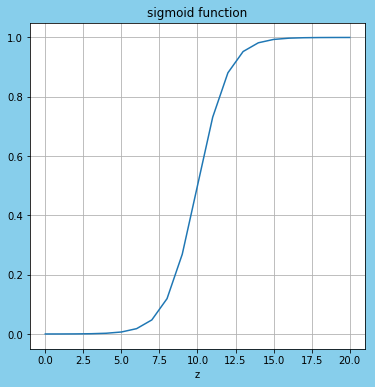

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

import math
# mathパッケージで自然対数の底eを定義する
e = math.e

def sigmoid(z):
    return 1/(1+(e**-z))

sigmoid_check = np.zeros(21)
for i in range(-10, 11):
    output = sigmoid(i)
#     print("z:{}, g(z):{}".format(i, output))
    sigmoid_check[i+10] = output
    
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()

# plot 
plt.title("sigmoid function")
plt.xlabel("z")

plt.plot(sigmoid_check)


### 目的関数
以下の数式で表されるロジスティック回帰の目的関数Jを実装してください。
<br>この数式には正則化項が含まれています。
<br>
$$
J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j
$$
$$
h_θ(x) = g(θ^T x)
$$
$$
g(z) = \frac{1}{1+e^{−z}}
$$
$$
Jθ:目的関数
$$
$$
m: 入力されるデータの数
$$
$$
hθ(): 仮定関数
$$
$$
x: 特徴量ベクトル
$$
$$
θ: パラメータベクトル
$$
$$
g() : シグモイド関数
$$
$$
x(i): i番目のサンプルの特徴量ベクトル
$$
$$
y(i) : i番目のサンプルの正解ラベル
$$
$$
θj: j番目のパラメータ（重み）
$$
$$
λ: 正則化パラメータ
$$

### 最急降下法
最急降下法により学習させてください。バイアス項およびj番目のパラメータの更新には以下の式を使います。
<br>
$$
j=0：バイアス項
$$
$$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} 
$$
$$
j\geq 1：バイアス項以外
$$
$$
\frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{λ}{m}\theta_j　 
$$

<br>
<br>
$$
i : サンプルのインデックス
$$
$$
j : 特徴量のインデックス
$$

## 検証 

### 【問題2】学習曲線のプロット
学習曲線をプロットしてください。

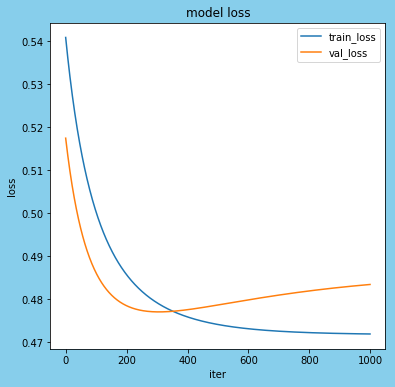

In [290]:
df_loss = pd.DataFrame(slr.loss)
val_loss = pd.DataFrame(slr.val_loss)


# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)
# ax.set_yscale('log') 
plt.grid()


# plot a cross section of mt.Fuji
plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")

p1, = plt.plot(df_loss, label='o')
p2, = plt.plot(val_loss, label='*')
plt.legend([p1, p2],["train_loss", "val_loss"], loc=1) # 凡例の位置, 名前の指定

plt.grid()
plt.show()

過学習を起こしてしまっている。実務では上のような状態は避けなければならない。

### 【問題3】指標値の算出
分類に関する指標値で精度を確認してください。

In [301]:
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


"""

get scores: accuracy, pecision, recall, F measure

"""
def get_scores(y_test, y_pred):
    scores_array = np.hstack((accuracy_score(y_test, y_pred), 
                             precision_score(y_test, y_pred),
                             recall_score(y_test, y_pred),
                             f1_score(y_test, y_pred)))
    return scores_array
    
scores = get_scores(y_test, y_pred)
index_score = [ "accuracy","precision","recall","f1"]
scores = pd.DataFrame(scores, index=index_score, columns={'iris_data':0})
scores

,iris_data
accuracy,0.766667
precision,0.650000
recall,1.000000
f1,0.787879


### 【問題4】決定領域の可視化
2値分類のデータセットに対して決定領域を可視化してください。

In [304]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the decision area of the model learned by binary classification with two dimensional 
    feature quantity.
     The color of the background is drawn from the estimated value by the learned model.
     The point of the scatter diagram is learning data.

     Parameters
     ------------------
     X_train: ndarray, shape (n_samples, 2)
         Characteristic quantity of learning data
     y_train: ndarray, shape (n_samples,)
         Correct value of learning data
     model: object
         **** Insert Instantus of the learned model
     step: float, (default: 0.1)
         Set interval to calculate estimated value
     title: str
         Give the text of the title of the graph
     xlabel, ylabel: str
         Give sentences of axis labels
     target_names =: list of str
         Give a list of legends
    """
    # define Initial setting 
    fig, ax = plt.subplots(figsize=(6, 6))
    fig.patch.set_facecolor('skyblue')
    fig.patch.set_alpha(1)
    ax.patch.set_facecolor('white')
    ax.patch.set_alpha(1)
    # ax.set_yscale('log') 
    plt.grid()
    
    # setting
    scatter_color = ['red', 'green']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
#     fig.patch.set_facecolor('blue')
#     fig.patch.set_alpha(1)
#     ax.patch.set_facecolor('white')
#     ax.patch.set_alpha(1)
#     plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='g', linewidths=5, alpha=0.5)
    
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=150, color=scatter_color[i], label=target_names[i], 
                    marker='x', alpha=0.7)
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

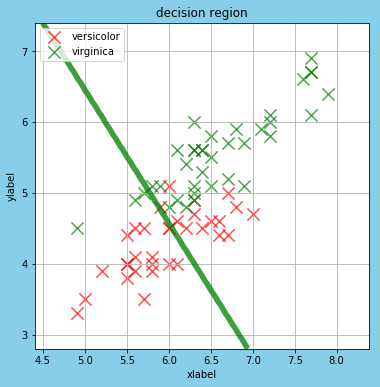

In [305]:
decision_region(X_train, y_train, slr)

### 【問題5】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。
<br>pickleモジュールやnumpy.savezを利用します。

In [309]:
import pickle

with open('model.pickle', mode='wb') as fp:
    pickle.dump(slr, fp, protocol=2)

In [312]:
with open('model.pickle', mode='rb') as fp:
    clf = pickle.load(fp)

In [313]:
print(clf)

## ディスカッション

### 【問題6】分類と回帰
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。
<br>分類問題と回帰問題は本質的に何が異なっていいるか
<br>
<br>注意点
<br>答えがある問いではありません。いろいろな視点から見て理解を深めていきましょう。

・具体的数値を予測するのが回帰問題で、種類を見分けるのが分類問題（簡易な回答）
<br>・その他